In [1]:
import csv
import numpy as np
import matplotlib.pylab as plt
import matplotlib
from datetime import datetime
import pandas as pd
import matplotlib.dates as md
import termplotlib as tpl
from matplotlib import style
from matplotlib.colors import ListedColormap
from matplotlib.pyplot import figure
from matplotlib.widgets import Slider


#matplotlib.use('module://drawilleplot')

In [33]:
x = np.linspace(0, 2 * np.pi, 10)
y = np.sin(x)

fig = tpl.figure()
fig.plot(x, y, label="data", width=50, height=15)
fig.show()

    1 +---------------------------------------+
  0.8 |    **     **                          |
  0.6 |   *         **           data ******* |
  0.4 | **                                    |
  0.2 |*              **                      |
    0 |                 **                    |
      |                                   *   |
 -0.2 |                   **            **    |
 -0.4 |                     **         *      |
 -0.6 |                              **       |
 -0.8 |                       **** **         |
   -1 +---------------------------------------+
      0     1    2     3     4     5    6     7


In [47]:






df = pd.read_table('/home/zow/LocoBox/actogram/test3.txt', sep='\s+', skiprows=12, index_col=None)
# print(df)
# df["dateindex"] = pd.to_datetime(df['MO/DY/YEAR']+' ' + df['HH:MM:SS'],
#                         format="%m/%d/%Y %H:%M:%S")
# # df['PIR01'][:i].plot(ax = ax)
# xticks = pd.date_range(start=min(df["dateindex"]),
#                   end=max(df["dateindex"]),
#                   periods=6)

x = df.index
y = df['PIR01']

fig = tpl.figure()

fig.plot(x, y, ylim =(0,50), label="PIR1", width=50, height=15)
ascii_p = fig.get_string()
fig.show()


  50 +----------------------------------------+
     | *                                      |
  40 | *                         PIR1 ******* |
     | *                                      |
  30 | *                                 *    |
     |**   *  *                *         *    |
     |***  ** *            *   *         *    |
  20 |**** ** *  **   *    * * *       * *    |
     |**** ***** *** **    * * *     *** *    |
  10 |**** ************  * *** ***   *** *    |
     |**** ************ ** ******* ********   |
   0 +----------------------------------------+
     0     1000   2000   3000  4000   5000   6000


In [43]:
log_mat =np.empty((120,12), dtype="<U10")
    

In [2]:
def import_data(filename, n_wheels):
   
    reader = pd.read_csv(filename, sep=' ')
    #     rows = [[r[0]] + list(map(int, r[1:])) for r in reader]

    # data = np.zeros((len(rows), n_wheels))
    # for i, row in enumerate(rows):
    #     data[i, :] = row[1:1 + n_wheels]
    # return data.T, [r[0] for r in rows]
    return reader 


def plot_actogram(data,  animals):
    

    N, T = data.shape
    #data /= np.max(data)
    times = data['times']#[datetime.strptime(t, '%m/%d/%y %H:%M') for t in times]
    times = matplotlib.dates.date2num(times)

    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    for i in range(N):
        d = data[i, :] != 0
        plt.plot_date(times[d], data[i, d] + i, '.', markersize=2, xdate=True)

    plt.grid(which='both')

    major_ticks = np.arange(8) + .25
    minor_ticks = np.arange(32) * .25
    ax.set_yticks(major_ticks)
    ax.set_yticks(minor_ticks, minor=True)
    ax.set_yticklabels(animals)
    ax.grid(which='minor', alpha=0.4)

    vals = ax.get_xticks()
    minor = []
    for i, val in enumerate(vals):
        for t in range(4):
            minor.append(val + t / 4.)
    ax.set_xticks(minor, minor=True)
    ax.grid(which='minor', alpha=0.4)

    plt.tight_layout()
    plt.show()


In [3]:
filename = '/home/zow/LocoBox/Prev_locobox_data/BOX1-5-20220719.txt'
headers = ['HH:MM:SS', 'MO/DY/YEAR', 'LED01', 'PIR01', 'LED02', 'PIR02', 'LED03', 'PIR03', 'LED04', 'PIR04', 'LED05', 'PIR05']

reader = pd.read_csv(filename,index_col=False, header= 0, sep=' ',dtype = {'HH:MM:SS':str,  'MO/DY/YEAR': str,  'LED01': int, 'PIR01': int,  'LED02': int, 'PIR02': int, 'LED03': int,  'PIR03':int,  'LED04':int,  'PIR04':int,'LED05':int,  'PIR05': int}, parse_dates= ['HH:MM:SS','MO/DY/YEAR' ] )


/home/zow/anaconda3/envs/locobox/lib/python3.7/site-packages/pandas/util/_decorators.py:311: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  return func(*args, **kwargs)


In [53]:
#reader["times"] = reader[[ 'MO/DY/YEAR','HH:MM:SS']].apply(lambda x: datetime.combine(x), axis=1)

for index, row in reader.iterrows():
    reader["times"][index] = datetime.combine(datetime.date(row['MO/DY/YEAR']), datetime.time(row['HH:MM:SS']))



/home/zow/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


TypeError: '(0, slice(None, None, None))' is an invalid key

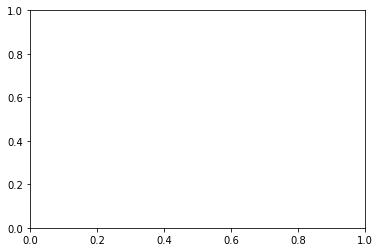

In [60]:
plot_actogram(reader, [1,2,3,4,5])

In [9]:

n_wheels = 5
animals = ['1730', '1734', '1736', '1743', '1744', '1745', '1746', '1747']
filename = '/home/zow/LocoBox/Prev_locobox_data/BOX1-5-20220719.txt'
data, t = import_data(filename, n_wheels)
plot_actogram(data, t, n_wheels, animals)

ParserError: Error tokenizing data. C error: Expected 2 fields in line 3, saw 12


In [2]:
style.use('seaborn-colorblind')

pd.set_option("display.max_rows", None)


In [12]:


box = 'BOX2'
pir = 'PIR02'
led = 'LED02'

filename = '/home/zow/LocoBox/actogram/BOX1-3-20181018.txt'


In [16]:
df = pd.read_table(filename, sep='\s+',
                skiprows=23, index_col=None)
df.index = pd.to_datetime(df['MO/DY/YEAR']+' ' + df['HH:MM:SS'],
                        format="%m/%d/%Y %H:%M:%S")
df0 = pd.DataFrame(
    {'HH:MM:SS': ['00:00:00'],  'MO/DY/YEAR':  [df['MO/DY/YEAR'][0]],
    'LED01': [0], 'PIR01': [0], 'LED02': [0], 'PIR02': [0], 'LED03': [0], 'PIR03': [0], 'LED04': [0], 'PIR04': [0], 'LED05': [0], 'PIR05': [0], 'LED06': [0], 'PIR06': [0], 'LED07': [0], 'PIR07': [0], 'LED08': [0], 'PIR08': [0], 'LED09': [0], 'PIR09': [0], 'LED10': [0], 'PIR10': [0]
    })
df0.index = pd.to_datetime(df0['MO/DY/YEAR']+' ' + df0['HH:MM:SS'],
                        format="%m/%d/%Y %H:%M:%S")

#df0 = df0.groupby(np.arange(len(df0))//60).mean() 

df1 = pd.DataFrame(
    {'HH:MM:SS': df['HH:MM:SS'][0],  'MO/DY/YEAR':  [df['MO/DY/YEAR'][0]],
    'LED01': [0], 'PIR01': [0], 'LED02': [0], 'PIR02': [0], 'LED03': [0], 'PIR03': [0], 'LED04': [0], 'PIR04': [0], 'LED05': [0], 'PIR05': [0], 'LED06': [0], 'PIR06': [0], 'LED07': [0], 'PIR07': [0], 'LED08': [0], 'PIR08': [0], 'LED09': [0], 'PIR09': [0], 'LED10': [0], 'PIR10': [0]
    })
df1.index = pd.to_datetime(df1['MO/DY/YEAR']+' ' + df1['HH:MM:SS'],
                        format="%m/%d/%Y %H:%M:%S")
# df1.index.set_value(df1.index, df1.index[0], pd.Timestamp(
#     df1.index.date[0].year, df1.index.date[0].month, df1.index.date[0].day, df1.index.time[0].hour, df1.index.time[0].minute-1, df1.index.time[0].second))

#df1 = df1.groupby(np.arange(len(df1))//60).mean() 

df2 = pd.DataFrame(
    {'HH:MM:SS': ['00:00:00'],  'MO/DY/YEAR':  [df['MO/DY/YEAR'][-1]],
    'LED01': [0], 'PIR01': [0], 'LED02': [0], 'PIR02': [0], 'LED03': [0], 'PIR03': [0], 'LED04': [0], 'PIR04': [0], 'LED05': [0], 'PIR05': [0], 'LED06': [0], 'PIR06': [0], 'LED07': [0], 'PIR07': [0], 'LED08': [0], 'PIR08': [0], 'LED09': [0], 'PIR09': [0], 'LED10': [0], 'PIR10': [0]
    })
df2.index = pd.to_datetime(df2['MO/DY/YEAR']+' ' + df2['HH:MM:SS'],
                        format="%m/%d/%Y %H:%M:%S")
# df2.index.set_value(df2.index, df2.index[0], pd.Timestamp(
#     df2.index.date[0].year, df2.index.date[0].month, df2.index.date[0].day, 23, 59, 0))



df3 = pd.DataFrame(
    {'HH:MM:SS': df['HH:MM:SS'][-1],  'MO/DY/YEAR':  [df['MO/DY/YEAR'][-1]],
    'LED01': [0], 'PIR01': [0], 'LED02': [0], 'PIR02': [0], 'LED03': [0], 'PIR03': [0], 'LED04': [0], 'PIR04': [0], 'LED05': [0], 'PIR05': [0], 'LED06': [0], 'PIR06': [0], 'LED07': [0], 'PIR07': [0], 'LED08': [0], 'PIR08': [0], 'LED09': [0], 'PIR09': [0], 'LED10': [0], 'PIR10': [0]
    })
df3.index = pd.to_datetime(df3['MO/DY/YEAR']+' ' + df3['HH:MM:SS'],
                        format="%m/%d/%Y %H:%M:%S")
# df3.index.set_value(df3.index, df3.index[0], pd.Timestamp(
#     df3.index.date[0].year, df3.index.date[0].month, df3.index.date[0].day, df3.index.time[0].hour, df3.index.time[0].minute+1, df3.index.time[0].second))

#df3 = df3.groupby(np.arange(len(df3))//60).mean() 


In [18]:
df2 = df2.groupby(np.arange(len(df2))//60. axis=0).mean() 
df = pd.concat([df0, df1, df, df3, df2])
#df = df.groupby(np.arange(len(df))//60).mean() 
dategroup = df.groupby(pd.Grouper(freq='D'))


k = 0
df2 = pd.DataFrame()
for name, group in dategroup:
    if k >= 1:
        a = group
        df2 = pd.concat([df2, a], axis=0)
    k = k+1

# Remove the marginsclear
dategroup2 = df2.groupby(pd.Grouper(freq='D'))
plt.rcParams['axes.autolimit_mode'] = 'round_numbers'
plt.rcParams['axes.xmargin'] = 0.
plt.rcParams['axes.ymargin'] = 0.1
#plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['axes.linewidth'] = 0.5 # axis thickness
plt.rcParams['font.family'] = ['sans serif']
plt.rcParams['font.size'] = 10

n_group = dategroup.ngroups

fig, axes = plt.subplots(nrows=n_group, ncols=2)

# Half-opaque grayscale colormap 
# by Bart https://stackoverflow.com/questions/37327308/add-alpha-to-an-existing-matplotlib-colormap
cmap = plt.cm.gray
my_cmap = cmap(np.arange(cmap.N))
my_cmap[:,-1] = np.linspace(0.2, 1, cmap.N)
my_cmap = ListedColormap(my_cmap)

# scale to 1000 if max PIR is 60
scale = 1000/max(group[pir])

# Double-plot actogram
# Plot the 1st column
j = 0
for name, group in dategroup:
    
    labels = [0, 3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48]
    (group[pir]*scale).plot.area(ax=axes[j, 0], sharey=True, cmap='gray', figsize=(4.5, 0.2*n_group))
    ((1-group[led])*800).plot.area(linewidth=0, ax=axes[j, 0],
                            cmap=my_cmap, sharey=True)
    axes[j, 0].axes.set_yticklabels([])
    axes[j, 0].axes.set_yticks([])
    #axes[j, 0].axes.set_xticks(range(1,18))
    axes[j, 0].axes.set_xticklabels(labels, rotation=0, size=8.5)
    axes[j, 0].axes.set_ylim(1,800)
    axes[j, 0].axes.set_xlabel('Hour of day', rotation=0, size=8.5)
    axes[j, 0].axes.set_ylabel(
        str(group[pir].index.date[0].month) + '/' + str(group[pir].index.date[0].day) + ' ', rotation=0, size=9)
    axes[j, 0].yaxis.set_label_coords(-0.125,0.0)
    if j < n_group-1:
        x_axis = axes[j, 0].axes.get_xaxis()
        x_axis.set_visible(False)
    j = j+1
# Plot the 2nd column
i = 0
for name, group in dategroup2:
    (group[pir]*scale).plot.area(ax=axes[i, 1], sharey=True, cmap='gray', figsize=(4.3, 0.2*n_group))
    ((1-group[led])*800).plot.area(linewidth=0,
                            cmap=my_cmap, ax=axes[i, 1], sharey=True)
    x_axis = axes[i, 1].axes.get_xaxis()
    x_axis.set_visible(False)
    axes[i, 1].axes.set_ylim(1,800)
    y_axis = axes[i, 1].axes.get_yaxis()
    y_axis.set_visible(False)
    i = i+1

fig.subplots_adjust(left=0.12, right=0.9, bottom=0.3, wspace=0, hspace=0)
plt.axis('off')
plt.suptitle(box, size=9)
#plt.savefig(box+'.png')
plt.show()





SyntaxError: invalid syntax (3789548653.py, line 1)